In [1]:
import pandas as pd
import numpy as np
import gspread
from oauth2client.service_account import ServiceAccountCredentials

In [2]:
from datetime import datetime
import time

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### connecting google sheets

In [4]:
# defining scope (scope means what access are given to the python script e.g. Read only, Write ,etc. )
scope = ["https://www.googleapis.com/auth/drive"]

In [5]:
# Json file to read the Credentials 
creds = ServiceAccountCredentials.from_json_keyfile_name('super5.json', scope)

In [6]:
# Using Credentials in the python script
client = gspread.authorize(creds)

In [7]:
sh = client.open('super5_sheet')

### getting data from all the sheets

In [8]:
sh.worksheets()

[<Worksheet 'scan' id:0>,
 <Worksheet 'transformed_vital' id:1714395340>,
 <Worksheet 'master' id:1375461875>,
 <Worksheet 'vital' id:1010280063>,
 <Worksheet 'device' id:1020435617>]

In [9]:
# Opening the Google Sheets (named = 'Tuto rial' & Spreadsheet named 'Sheet1' ,[Note : Name is Case Sensitive] )
worksheet_master = sh.worksheet("master")

In [10]:
# Getting Data from the google sheets
data_master = worksheet_master.get_all_records()

In [11]:
df_master = pd.DataFrame.from_dict(data_master)

In [92]:
worksheet_vital = client.open('super5_sheet').worksheet("vital")

In [93]:
data_vital = worksheet_vital.get_all_records()

In [94]:
df_vital = pd.DataFrame.from_dict(data_vital)

In [15]:
worksheet_scan = client.open('super5_sheet').worksheet("scan")

In [16]:
data_scan = worksheet_scan.get_all_records()

In [17]:
df_scan = pd.DataFrame.from_dict(data_scan)

In [18]:
worksheet_device = client.open('super5_sheet').worksheet("device")

data_device = worksheet_scan.get_all_records()

df_device = pd.DataFrame.from_dict(data_device)

In [19]:
worksheet_transformed_vital = client.open('super5_sheet').worksheet("transformed_vital")

data_transformed_vital = worksheet_scan.get_all_records()

df_transformed_vital = pd.DataFrame.from_dict(data_transformed_vital)

#### dataframes available

1. df_device 
2. df_master
3. df_scan
4. df_vital
5. df_transformed_vital

### manipulating df

In [20]:
df_master.columns

Index(['Age', 'Class', 'Current Age', 'Current date', 'DOB', 'Device ID',
       'Name', 'Roll No', 'School', 'Sex', 'Unique ID'],
      dtype='object')

In [21]:
# 'Date and Time' : 'Ts', 'Roll No' : 'Roll_num', 'Unique ID' : 'UID'

In [22]:
df_master = df_master.rename(columns = {'Class' : 'Class_', 'Current Age' : 'Current_age', 'Current date' : 'Current_dt', 'Device ID' : 'DeviceID',
        'Roll No' : 'Roll_num', 'Unique ID' : 'UID'})

In [23]:
df_master.Class_ = df_master.Class_.astype('str')
df_master.Name = df_master.Name.astype('str')
df_master.School = df_master.School.astype('str')
df_master.Sex = df_master.Sex.astype('str')
df_master.UID = df_master.UID.astype('str')
df_master.DOB = df_master.DOB.astype('datetime64[ns]')
df_master.Current_dt = df_master.Current_dt.astype('datetime64[ns]')

df_master.dtypes

Age                     int64
Class_                 object
Current_age            object
Current_dt     datetime64[ns]
DOB            datetime64[ns]
DeviceID                int64
Name                   object
Roll_num                int64
School                 object
Sex                    object
UID                    object
dtype: object

In [24]:
df_master.head()

,Age,Class_,Current_age,Current_dt,DOB,DeviceID,Name,Roll_num,School,Sex,UID
0,6,1,6.6,2020-02-22,2013-10-07,1,Khushi,1,Manthan,F,1/1
1,6,1,#VALUE!,2020-02-22,2013-04-24,1,Ananya,2,Manthan,F,1/2
2,5,1,6,2020-02-22,2014-05-03,1,Chand,3,Manthan,M,1/3
3,6,1,6.5,2020-02-22,2013-01-09,1,Rooparam,4,Manthan,M,1/4
4,5,1,6.1,2020-02-22,2014-01-01,1,Shubham,5,Manthan,M,1/5


In [25]:
# datetime.strptime(df_master.Current_dt[0], '%m/%d/%Y')

In [26]:
# datetime.strptime(df_master.DOB[0], '%m/%d/%Y')

In [27]:
df_master['Age'] = (df_master.Current_dt - df_master.DOB)
df_master.head()

,Age,Class_,Current_age,Current_dt,DOB,DeviceID,Name,Roll_num,School,Sex,UID
0,2329 days,1,6.6,2020-02-22,2013-10-07,1,Khushi,1,Manthan,F,1/1
1,2495 days,1,#VALUE!,2020-02-22,2013-04-24,1,Ananya,2,Manthan,F,1/2
2,2121 days,1,6,2020-02-22,2014-05-03,1,Chand,3,Manthan,M,1/3
3,2600 days,1,6.5,2020-02-22,2013-01-09,1,Rooparam,4,Manthan,M,1/4
4,2243 days,1,6.1,2020-02-22,2014-01-01,1,Shubham,5,Manthan,M,1/5


In [28]:
df_master['Age'] = df_master.Age / np.timedelta64(1, 'Y')

In [29]:
df_master.columns

Index(['Age', 'Class_', 'Current_age', 'Current_dt', 'DOB', 'DeviceID', 'Name',
       'Roll_num', 'School', 'Sex', 'UID'],
      dtype='object')

In [30]:
df_master = df_master[['Age', 'Class_', 'Current_dt', 'DOB', 'DeviceID', 'Name',
       'Roll_num', 'School', 'Sex', 'UID']]

#### Clean df_master

In [31]:
df_master.head()

,Age,Class_,Current_dt,DOB,DeviceID,Name,Roll_num,School,Sex,UID
0,6.376585,1,2020-02-22,2013-10-07,1,Khushi,1,Manthan,F,1/1
1,6.831078,1,2020-02-22,2013-04-24,1,Ananya,2,Manthan,F,1/2
2,5.807101,1,2020-02-22,2014-05-03,1,Chand,3,Manthan,M,1/3
3,7.118558,1,2020-02-22,2013-01-09,1,Rooparam,4,Manthan,M,1/4
4,6.141125,1,2020-02-22,2014-01-01,1,Shubham,5,Manthan,M,1/5


In [32]:
# Nulls in DOB

In [33]:
df_master.School.value_counts()

Shiksha Niketan           307
Tyod                      215
Jai Hind Public School    151
Jundhda                   105
Brijpura                  104
Manthan                    92
Choti Dhani                58
NS Bhadun                  28
NS Roopangarh              28
NS Kotri                   28
NS Ulana                   27
NS Jabdinagar              26
NS Padampura               23
Name: School, dtype: int64

In [34]:
df_master[df_master.Age.isna()].School.value_counts()

Brijpura                  104
Choti Dhani                58
Tyod                       17
Jai Hind Public School     16
Shiksha Niketan             7
Jundhda                     2
Manthan                     2
Name: School, dtype: int64

In [35]:
# from scipy.stats import norm
# sns.set_color_codes()
# , hist=True , fit=norm , color = 'b'

#### Distribution of Age

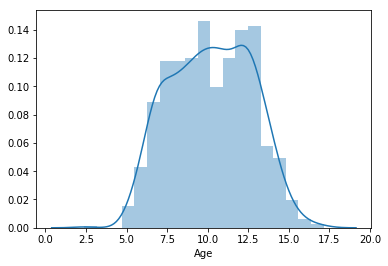

In [36]:
sns.distplot(df_master[df_master.Age.notna()].Age )

In [37]:
df_master_stud_count = pd.DataFrame(df_master.School.value_counts(normalize = True) * 100).reset_index().\
rename(columns = {'index' : 'School' , 'School' : 'Percentage_of_students'})

In [38]:
df_master_agg1 = df_master.groupby(['School']).School.agg(['count']).reset_index().sort_values(['count'] , ascending = False)

In [39]:
df_master_agg2 = df_master.groupby(['School','Sex']).School.agg(['count']).reset_index().sort_values(['School'] , ascending = True)

In [40]:
df_master_stud_count

,School,Percentage_of_students
0,Shiksha Niketan,25.755034
1,Tyod,18.036913
2,Jai Hind Public School,12.667785
3,Jundhda,8.808725
4,Brijpura,8.724832
5,Manthan,7.718121
6,Choti Dhani,4.865772
7,NS Bhadun,2.348993
8,NS Roopangarh,2.348993
9,NS Kotri,2.348993


#### Bar chart (Percentage of Students from given School)

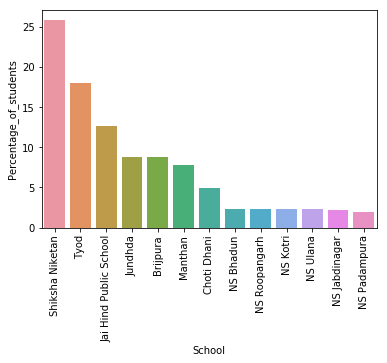

In [41]:
# plt.subplots(figsize= (10,10))
plt.xticks(rotation='vertical')
sns.barplot(x="School", y="Percentage_of_students", data=df_master_stud_count  )

#### Gender wise cont of Students

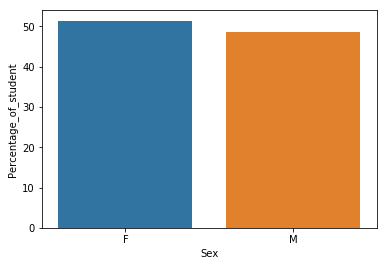

In [42]:
# Ignored the cases in which gender column was not filled 
sns.barplot(data = pd.DataFrame(df_master[df_master.Sex.isin(['M','F'])].Sex.value_counts(normalize = True)*100).reset_index().\
 rename(columns = {'index' : 'Sex' , 'Sex' : 'Percentage_of_student'}) 
,x = 'Sex'
,y = 'Percentage_of_student')

#### Bar chart (Count of Students from given School)

In [43]:
df_master_agg1 = df_master_agg1.rename(columns = {'count' : 'Count_of_student'})

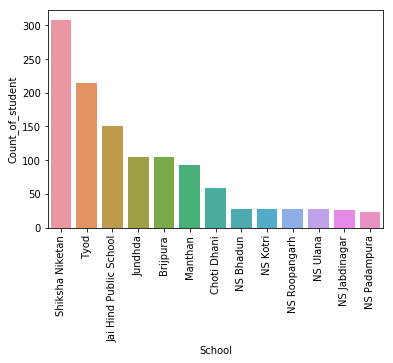

In [44]:
# plt.subplots(figsize= (10,10))
plt.xticks(rotation='vertical')
sns.barplot(x="School", y="Count_of_student", data=df_master_agg1  )

#### Bar chart (Gender Wise Count of Students from given School)

In [45]:
df_master_agg2 = df_master_agg2.rename(columns = {'count' : 'Count_of_student'})

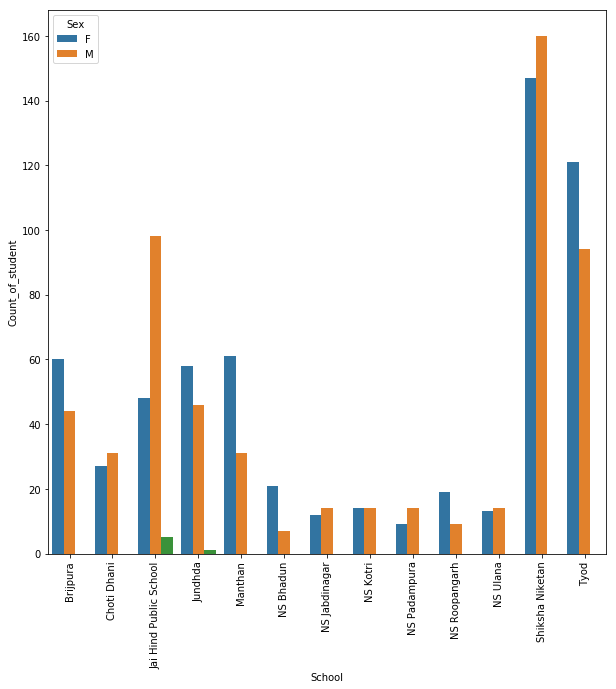

In [48]:
plt.subplots(figsize= (10,10))
plt.xticks(rotation='vertical')
p = sns.barplot(x="School", y="Count_of_student" , hue = 'Sex', data=df_master_agg2  )
p

In [96]:
df_vital.head()

,CBC - Hb,Class,Device ID,Health camp Date,Height,HemoQ - Hb,Hemocheck - Hb,MissionHb,Name,Rad67 - Hb,Roll No,SahilMethod - Hb,School,Touch Hb,Unique ID,Weight
0,13.1,1,1,09-12-2019,120.3,11.5,13.5,11.5,Khushi,12.8,1,8.5,Manthan,,1/1,20.3
1,11.4,1,1,09-12-2019,104.3,11.9,9.8,10.6,Ananya,12.2,2,11,Manthan,,1/2,14.3
2,11,1,1,09-12-2019,116.4,10.6,9,9.3,Chand,12.3,3,10.2,Manthan,,1/3,16.4
3,10.8,1,1,09-12-2019,107.8,11.3,13,9.3,Rooparam,12.5,4,11.4,Manthan,13.5,1/4,13.6
4,12,1,1,09-12-2019,98.6,12.5,12.5,10,Shubham,12,5,9.5,Manthan,,1/5,12.9


In [97]:
# for i in list(df_vital.columns):
#     print(i , ":", i.replace("-", "_").replace(' ' , '') , "")

In [98]:
df_vital = df_vital.rename(columns = 
                {
                    'CBC - Hb' : 'CBC_Hb',
                    'Class' : 'Class',
                    'Device ID' : 'DeviceID',
                    'Health camp Date' : 'HealthcampDate',
                    'Height' : 'Height',
                    'HemoQ - Hb' : 'HemoQ_Hb',
                    'Hemocheck - Hb' : 'Hemocheck_Hb',
                    'MissionHb' : 'MissionHb',
                    'Name' : 'Name',
                    'Rad67 - Hb' : 'Rad67_Hb',
                    'Roll No' : 'RollNo',
                    'SahilMethod - Hb' : 'SahilMethod_Hb',
                    'School' : 'School',
                    'Touch Hb' : 'TouchHb',
                    'Unique ID' : 'UniqueID',
                    'Weight' : 'Weight'
                })
df_vital.head()

,CBC_Hb,Class,DeviceID,HealthcampDate,Height,HemoQ_Hb,Hemocheck_Hb,MissionHb,Name,Rad67_Hb,RollNo,SahilMethod_Hb,School,TouchHb,UniqueID,Weight
0,13.1,1,1,09-12-2019,120.3,11.5,13.5,11.5,Khushi,12.8,1,8.5,Manthan,,1/1,20.3
1,11.4,1,1,09-12-2019,104.3,11.9,9.8,10.6,Ananya,12.2,2,11,Manthan,,1/2,14.3
2,11,1,1,09-12-2019,116.4,10.6,9,9.3,Chand,12.3,3,10.2,Manthan,,1/3,16.4
3,10.8,1,1,09-12-2019,107.8,11.3,13,9.3,Rooparam,12.5,4,11.4,Manthan,13.5,1/4,13.6
4,12,1,1,09-12-2019,98.6,12.5,12.5,10,Shubham,12,5,9.5,Manthan,,1/5,12.9


In [470]:
q = df_vital[~df_vital.CBC_Hb.isin(['' , 'refused blood draw'])]
q.head()

,CBC_Hb,Class,DeviceID,HealthcampDate,Height,HemoQ_Hb,Hemocheck_Hb,MissionHb,Name,Rad67_Hb,RollNo,SahilMethod_Hb,School,TouchHb,UniqueID,Weight
0,13.1,1,1,09-12-2019,120.3,11.5,13.5,11.5,Khushi,12.8,1,8.5,Manthan,,1/1,20.3
1,11.4,1,1,09-12-2019,104.3,11.9,9.8,10.6,Ananya,12.2,2,11,Manthan,,1/2,14.3
2,11,1,1,09-12-2019,116.4,10.6,9,9.3,Chand,12.3,3,10.2,Manthan,,1/3,16.4
3,10.8,1,1,09-12-2019,107.8,11.3,13,9.3,Rooparam,12.5,4,11.4,Manthan,13.5,1/4,13.6
4,12,1,1,09-12-2019,98.6,12.5,12.5,10,Shubham,12,5,9.5,Manthan,,1/5,12.9


In [169]:
q.CBC_Hb = q.CBC_Hb.astype('float64')
q.dtypes

CBC_Hb            float64
Class              object
DeviceID            int64
HealthcampDate     object
Height             object
HemoQ_Hb           object
Hemocheck_Hb       object
MissionHb          object
Name               object
Rad67_Hb           object
RollNo              int64
SahilMethod_Hb     object
School             object
TouchHb            object
UniqueID           object
Weight             object
dtype: object

In [173]:
q.shape

(1029, 16)

In [174]:
df_master.shape

(1192, 10)

In [185]:
df_master[df_master.Roll_num == 31]

,Age,Class_,Current_dt,DOB,DeviceID,Name,Roll_num,School,Sex,UID
30,9.497799,3,2020-02-22,2010-08-24,2,Priyanka Jadiya,31,Manthan,F,2/31
178,7.140461,2A,2020-02-22,2013-01-01,7,Anjana,31,Shiksha Niketan,F,7/31
512,6.538122,2,2020-02-22,2013-08-09,17,Rahul Gurjar,31,Tyod,M,17/31
727,9.141871,2,2020-02-22,2011-01-01,23,mahavir,31,Jai Hind Public School,M,23/31
880,NaN,4,2020-02-22,NaT,31,Arman 2,31,Brijpura,M,31/31
984,NaN,3,2020-02-22,NaT,34,Raj Choudhary,31,Choti Dhani,M,34/31
1040,7.726374,3,2020-02-22,2012-06-01,27,mamta,31,Jundhda,F,27/31


In [187]:
# Priyanka Jadiya has Device ID = 1 in vital sheet and 2 in Master sheet 
# So I am not able to use unique ID as joinin g condition 
# further there is a thing to ask can a student have more than 1 device with them 

In [468]:
# q[q.RollNo == 31]

In [190]:
check = pd.merge(q , df_master[['Sex','UID']] , left_on = ['UniqueID'] , right_on = ['UID'] , how = 'left')
check.head()

,CBC_Hb,Class,DeviceID,HealthcampDate,Height,HemoQ_Hb,Hemocheck_Hb,MissionHb,Name,Rad67_Hb,RollNo,SahilMethod_Hb,School,TouchHb,UniqueID,Weight,Sex,UID
0,13.1,1,1,09-12-2019,120.3,11.5,13.5,11.5,Khushi,12.8,1,8.5,Manthan,,1/1,20.3,F,1/1
1,11.4,1,1,09-12-2019,104.3,11.9,9.8,10.6,Ananya,12.2,2,11,Manthan,,1/2,14.3,F,1/2
2,11.0,1,1,09-12-2019,116.4,10.6,9,9.3,Chand,12.3,3,10.2,Manthan,,1/3,16.4,M,1/3
3,10.8,1,1,09-12-2019,107.8,11.3,13,9.3,Rooparam,12.5,4,11.4,Manthan,13.5,1/4,13.6,M,1/4
4,12.0,1,1,09-12-2019,98.6,12.5,12.5,10,Shubham,12,5,9.5,Manthan,,1/5,12.9,M,1/5


In [203]:
check1.head(1).columns

Index(['CBC_Hb', 'Class', 'DeviceID_x', 'HealthcampDate', 'Height', 'HemoQ_Hb',
       'Hemocheck_Hb', 'MissionHb', 'Name', 'Rad67_Hb', 'RollNo',
       'SahilMethod_Hb', 'School', 'TouchHb', 'UniqueID', 'Weight', 'Age',
       'Class_', 'Current_dt', 'DOB', 'DeviceID_y', 'Roll_num', 'Sex', 'UID'],
      dtype='object')

In [208]:
check1 = pd.merge(q , df_master , left_on = ['RollNo' , 'Name' , 'School'] , right_on = ['Roll_num' , 'Name' , 'School'] , how = 'inner')
# check1[check1['DeviceID_y'] !=check1['DeviceID_x']][['DeviceID_y' , 'DeviceID_x']].groupby(['DeviceID_x','DeviceID_y']).DeviceID_x.agg(['count'])

In [232]:
def custom_round(row):
    if row.Age % 1 >= 0.5:
        return np.ceil(row.Age)
    else:
        return np.floor(row.Age)

In [234]:
check1['Age_round'] = check1.apply(custom_round,axis = 1 )

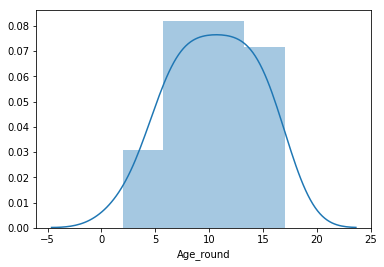

In [241]:
sns.distplot(x.Age_round)

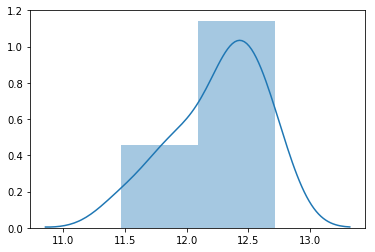

In [239]:
# Distribution of Mean CBC_Hb across Genders

x = check1.groupby(['Age_round' , 'Sex']).CBC_Hb.agg(['mean']).reset_index()
sns.distplot(x[x.Sex == 'M'][['mean']])

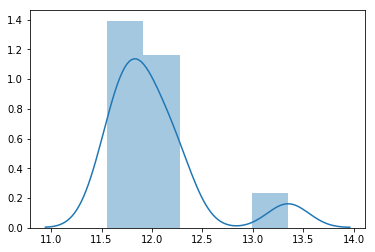

In [240]:
sns.distplot(x[x.Sex == 'F'][['mean']])

In [191]:
check = pd.merge(q , df_master , left_on = ['UniqueID'] , right_on = ['UID'] , how = 'left')
check.head()

,CBC_Hb,Class,DeviceID_x,HealthcampDate,Height,HemoQ_Hb,Hemocheck_Hb,MissionHb,Name_x,Rad67_Hb,...,Age,Class_,Current_dt,DOB,DeviceID_y,Name_y,Roll_num,School_y,Sex,UID
0,13.1,1,1,09-12-2019,120.3,11.5,13.5,11.5,Khushi,12.8,...,6.376585,1,2020-02-22,2013-10-07,1.0,Khushi,1.0,Manthan,F,1/1
1,11.4,1,1,09-12-2019,104.3,11.9,9.8,10.6,Ananya,12.2,...,6.831078,1,2020-02-22,2013-04-24,1.0,Ananya,2.0,Manthan,F,1/2
2,11.0,1,1,09-12-2019,116.4,10.6,9,9.3,Chand,12.3,...,5.807101,1,2020-02-22,2014-05-03,1.0,Chand,3.0,Manthan,M,1/3
3,10.8,1,1,09-12-2019,107.8,11.3,13,9.3,Rooparam,12.5,...,7.118558,1,2020-02-22,2013-01-09,1.0,Rooparam,4.0,Manthan,M,1/4
4,12.0,1,1,09-12-2019,98.6,12.5,12.5,10,Shubham,12,...,6.141125,1,2020-02-22,2014-01-01,1.0,Shubham,5.0,Manthan,M,1/5
5,13.5,1,1,09-12-2019,110.5,13.9,11,11.2,Bhagyashri,13,...,6.447771,1,2020-02-22,2013-09-11,1.0,Bhagyashri,6.0,Manthan,F,1/6
6,11.5,1,1,09-12-2019,120.3,11.1,11,11.4,Chintu,13,...,5.437483,1,2020-02-22,2014-09-15,1.0,Chintu,7.0,Manthan,M,1/7
7,10.5,1,1,09-12-2019,115.4,11.2,12.5,9.6,Teena Sen,13,...,6.250642,1,2020-02-22,2013-11-22,1.0,Teena Sen,8.0,Manthan,F,1/8
8,11.8,1,1,09-12-2019,105.6,12.7,11.5,9.8,Gunjan,13.6,...,7.140461,1,2020-02-22,2013-01-01,1.0,Gunjan,9.0,Manthan,F,1/9
9,11.4,2,1,09-12-2019,129.1,6.8,10,7.4,Bharat,11.6,...,7.797559,2,2020-02-22,2012-05-06,1.0,Bharat,10.0,Manthan,M,1/10


In [249]:
s = df_vital[df_vital.Height != '']
s.Height = s.Height.astype('float64')

C:\Users\BOUNCE\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


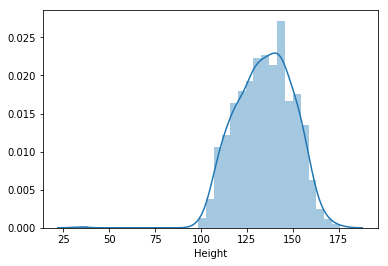

In [251]:
sns.distplot(s.Height)

In [259]:
z = pd.merge(df_vital , df_master , left_on = ['RollNo' , 'Name' , 'School'] , right_on = ['Roll_num' , 'Name' , 'School'] , how = 'inner')
z.head()

,CBC_Hb,Class,DeviceID_x,HealthcampDate,Height,HemoQ_Hb,Hemocheck_Hb,MissionHb,Name,Rad67_Hb,...,UniqueID,Weight,Age,Class_,Current_dt,DOB,DeviceID_y,Roll_num,Sex,UID
0,13.1,1,1,09-12-2019,120.3,11.5,13.5,11.5,Khushi,12.8,...,1/1,20.3,6.376585,1,2020-02-22,2013-10-07,1,1,F,1/1
1,11.4,1,1,09-12-2019,104.3,11.9,9.8,10.6,Ananya,12.2,...,1/2,14.3,6.831078,1,2020-02-22,2013-04-24,1,2,F,1/2
2,11,1,1,09-12-2019,116.4,10.6,9,9.3,Chand,12.3,...,1/3,16.4,5.807101,1,2020-02-22,2014-05-03,1,3,M,1/3
3,10.8,1,1,09-12-2019,107.8,11.3,13,9.3,Rooparam,12.5,...,1/4,13.6,7.118558,1,2020-02-22,2013-01-09,1,4,M,1/4
4,12,1,1,09-12-2019,98.6,12.5,12.5,10,Shubham,12,...,1/5,12.9,6.141125,1,2020-02-22,2014-01-01,1,5,M,1/5


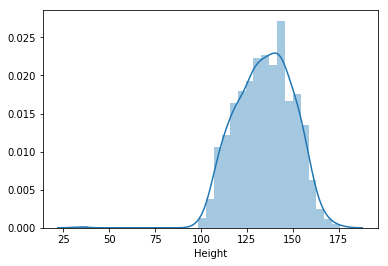

In [271]:
sns.distplot(z[z.Height != ''].Height.astype('float') )

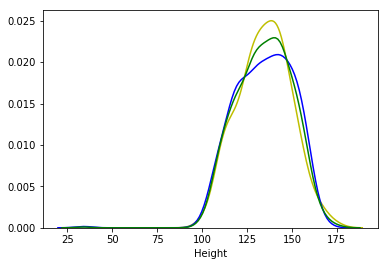

In [280]:
sns.distplot(z[(z.Height != '') & (z.Sex == 'M')].Height.astype('float'), hist=False,  color = 'y')
sns.distplot(z[(z.Height != '') & (z.Sex == 'F')].Height.astype('float'), hist=False,  color = 'b')
sns.distplot(z[z.Height != ''].Height.astype('float'), hist=False,  color = 'g')

plt.show()

In [ ]:
sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips

In [284]:
z['Age_round'] = z.apply(custom_round , axis = 1 )

In [285]:
z[z.Height != ''].head()

,CBC_Hb,Class,DeviceID_x,HealthcampDate,Height,HemoQ_Hb,Hemocheck_Hb,MissionHb,Name,Rad67_Hb,...,Weight,Age,Class_,Current_dt,DOB,DeviceID_y,Roll_num,Sex,UID,Age_round
0,13.1,1,1,09-12-2019,120.3,11.5,13.5,11.5,Khushi,12.8,...,20.3,6.376585,1,2020-02-22,2013-10-07,1,1,F,1/1,6.0
1,11.4,1,1,09-12-2019,104.3,11.9,9.8,10.6,Ananya,12.2,...,14.3,6.831078,1,2020-02-22,2013-04-24,1,2,F,1/2,7.0
2,11,1,1,09-12-2019,116.4,10.6,9,9.3,Chand,12.3,...,16.4,5.807101,1,2020-02-22,2014-05-03,1,3,M,1/3,6.0
3,10.8,1,1,09-12-2019,107.8,11.3,13,9.3,Rooparam,12.5,...,13.6,7.118558,1,2020-02-22,2013-01-09,1,4,M,1/4,7.0
4,12,1,1,09-12-2019,98.6,12.5,12.5,10,Shubham,12,...,12.9,6.141125,1,2020-02-22,2014-01-01,1,5,M,1/5,6.0


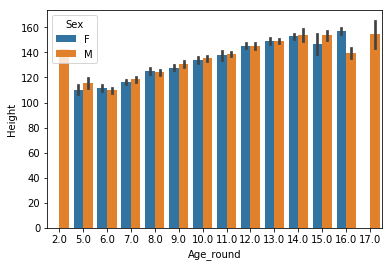

In [288]:
sns.barplot(data = z[z.Height != ''] , hue = 'Sex' , x = 'Age_round' ,y = 'Height' )

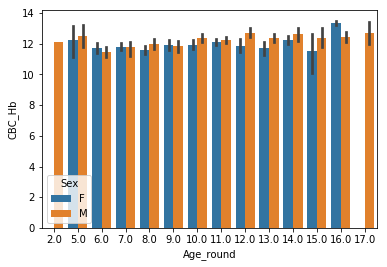

In [294]:
sns.barplot(data = z[~z.CBC_Hb.isin(['','refused blood draw'])] , hue = 'Sex' , x = 'Age_round' ,y = 'CBC_Hb' )

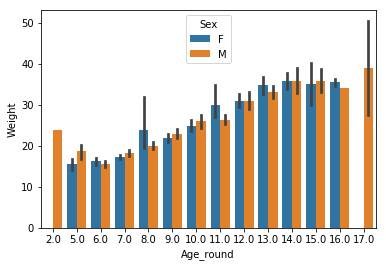

In [297]:
sns.barplot(data = z[~z.Weight.isin([''])], hue = 'Sex' , x = 'Age_round' ,y = 'Weight' )

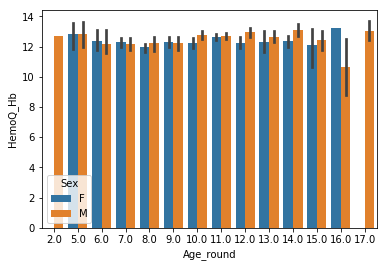

In [301]:
sns.barplot(data = z[~z.HemoQ_Hb.isin([''])], hue = 'Sex' , x = 'Age_round' ,y = 'HemoQ_Hb' )

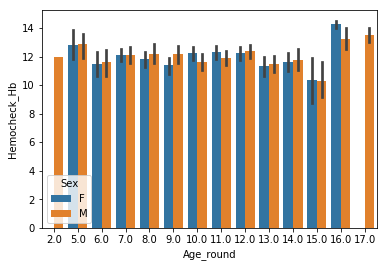

In [303]:
sns.barplot(data = z[~z.Hemocheck_Hb.isin([''])], hue = 'Sex' , x = 'Age_round' ,y = 'Hemocheck_Hb' )

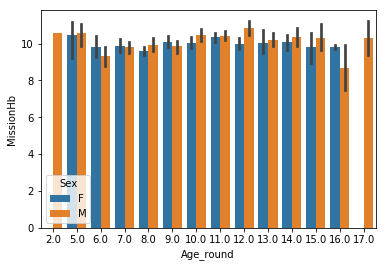

In [409]:
sns.barplot(data = z[~z.MissionHb.isin([''])], hue = 'Sex' , x = 'Age_round' ,y = 'MissionHb' )

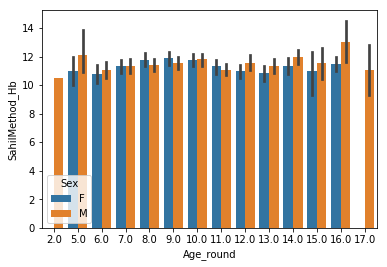

In [339]:
sns.barplot(data = z[~z.SahilMethod_Hb.isin(['' , '20+'])], hue = 'Sex' , x = 'Age_round' ,y = 'SahilMethod_Hb' )

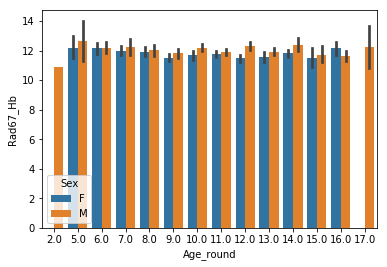

In [389]:
sns.barplot(data = z[~z.Rad67_Hb.isin(['' , 'low spo2' , '11..1' , '11,1'])], hue = 'Sex' , x = 'Age_round' ,y = 'Rad67_Hb' )

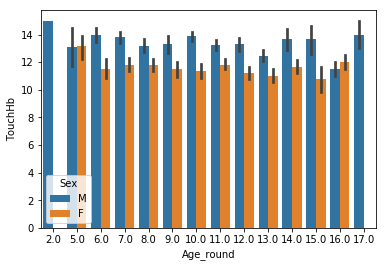

In [398]:
sns.barplot(data = z[~z.TouchHb.isin(['','not working'])], hue = 'Sex' , x = 'Age_round' ,y = 'TouchHb' )

# END

In [425]:
# df_scan[['Roll No']] = df_scan[['Roll No']].astype('int64')

In [452]:
# chek = df_scan
# chek = chek.rename(columns = {'Roll No' : 'Roll_no'})
# chek[['Date and Time']] = chek[['Date and Time']].astype('datetime64[ns]')
# chek = chek[chek.Roll_no.isin([4,3,2,1])].sort_values(['Date and Time'] , ascending = True)

In [467]:
# chek['new'] = chek.groupby(['Unique ID'])[['Date and Time']].shift(-1)
# chek['time_diff'] = chek['new'] - chek['Date and Time']
# # chek[['Unique ID','time_diff']].groupby(['Unique ID'])['time_diff'].agg(['mean'])
# # chek.dtypes

In [469]:
# df_scan[['Roll No']].groupby(['Roll No'])[['Roll No']].agg(['count'])